# GALAH DR4: Valdiation of flag_sp

In [306]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import pickle
import pandas as pd
import pandas as pd
from scipy import stats
from astropy.table import Table, join
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.constants as c
from scipy.optimize import curve_fit

In [232]:
# Read in the master "Classification" file and get rid of "normal stars" with no/nan comments
by_eye_classifications = pd.read_excel('spectrum_classification_by_eye.xlsx',dtype=str)
by_eye_classifications['comment'] = np.array([str(x) for x in by_eye_classifications['comment']])
by_eye_classifications = by_eye_classifications[by_eye_classifications['comment']!='nan']

# Find unique classifications.
# Classifications in the "comment" column are separated by ','.
line_comments = list(by_eye_classifications['comment'])
unique_classification = []
for comments in line_comments:
    for comment in comments.split(','):
        if comment not in unique_classification:
            unique_classification.append(comment)
unique_classification

['CCD3',
 'wrong_sp_cool_dwarf',
 'SB2',
 'SB1',
 'peculiar_spectrum',
 'Al',
 'emission',
 'triple',
 'bad_spectrum',
 'SB1_candidate',
 'hot',
 'CCD2',
 'CCD1',
 'K_is',
 'DIB',
 'RV',
 'wrong_logg',
 'vsini']

In [100]:
# Now go through the by_eye_classifications and feed al SOBJECT_ID into unique keywords, if the unique classification applies
classified_sobject_ids = dict()
for classification in unique_classification:
    classified_line = [classification in line_comment for line_comment in by_eye_classifications['comment']]
    classified_sobject_ids[classification] = np.array(by_eye_classifications['sobject_id'][classified_line])

In [101]:
classified_sobject_ids['SB1']

array(['131216001101033', '131216001101173', '131216001101204',
       '131216001101211', '131216001101316', '131216001601004',
       '131216001601008', '131216001601022', '131216001601030',
       '131216001601032', '131216001601037', '131216001601049',
       '131216001601055', '131216001601082', '131216001601093',
       '131216001601109', '131216001601111', '131216001601112',
       '131216001601114', '131216001601115', '131216001601121',
       '131216001601122', '131216001601124', '131216001601125',
       '131216001601126', '131216001601131', '131216001601155',
       '131216001601156', '131216001601162', '131216001601187',
       '131216001601192', '131216001601196', '131216001601198',
       '131216001601212', '131216001601222', '131216001601228',
       '131216001601238', '131216001601244', '131216001601255',
       '131216001601265', '131216001601268', '131216001601274',
       '131216001601277', '131216001601324', '131216001601326',
       '131216001601328', '1312160016013

In [102]:
classified_sobject_ids['triple']

array(['131216001101122', '131216001101313'], dtype=object)

In [ ]:
# Binary List
binaries = [
    131216001101015,
    131216001101026,
    131216001101059,
    131216001101122, # Triple!
    131216001101236,
    131216001601054,
    131216002101139,
    131217003901059, # Binary
    131217003901101,
    131217003901163, # Binary
    140111002601019, # Binary
    140111002601065, # Binary
    140112002801065, # Binary
    140209002701244, # Binary
    140209002701258, # Binary
    140316004601011,
    140409003001336,
    140707000601023,
    140806001701062, # Binary star with split lines...
    140809004901383,
    140810002201339,
    140810004201274,
    140814003801018,
    140814004801381,
    141231004001024,
    150429003101026,
    150703004101373,
    150830006601013, # Binary
    150831006001335, # Binary in NIR
    151227004201013, # Binary
    161213002601110,
    170220004101078,
    190614005601293,
    200214003001072,
    200907005101005,
    200926003601272,
    210325001601082,
]

In [2]:
# Hot and/or Fast-Rot, binarity unclear
hot_fast_rotators = [
    131216001601032,
    131216001601042,
    131216001601323,
    131216001601338,
    140111002101195,
    140409003001151,
    150427001301353,
    161213002101257,
    161228002501361,
    171227003601015,
    180130002801368,
    190224001601057,
    201006001601153,
    210328002101234,
    210515003301055,
    210606004501164,
]

# GALAH Red Pipeline RV wrong
wrong_rv_red_pipeline = [
    131216002101190,
    140112001801107,
    140112001801392,
    140115003101086, # wrong VRAD!
    140115003101246,
    140115003101336,
    140710004601359,
    140813001601077,
    141202003701020,
    150112003001210,
    150412003601222, # wrong VRAD, Balmer Lines in Emission!
    150901003001265,
    170509005201277, # CCD3 RV?
    170509006701393, # CCD3 RV?
    170127002301226,
    170806002601012,
    190224004201399,
    220124001601273,
    220218002101314,
]

# GALAH spectrum bad
bad_spectra = [
    140310003801343,
    140713001901346,
    140810004201377,
    150109001001044,
    150109001001349,
    150410002801242,    
    150607004101040,
    140316002801001, # Is there even any signal? :D
    160107004101288, # Is there even any signal? :D
    160107004101290, # Is there even any signal? :D
    170509003701359,
    200512002101170,
    200513002601132,
    200514005201245,
    200517003201391,
    200714001301029,
    200714001301058,
    200803003201037,
    210403002101190,
    210925002101043,
    220422002101291,
]

# Strong K absorption feature
interstellar_k_stars = [
    170219001601156, # strong interstellar K
    170219001601167, # strong interstellar K!
    170220001601018, # Strong interstellar K
    170508005901143, # Strong interstellar K
    170712001601268, # Strong interstellar K
    210915004301310,
]

# Non-Binary List
normal_stars = [
    131216001101030,
    131216001101137,
    131216001101160,
    131216001101182,
    131216001101212,
    131216001601028,
    140112002301280,
    140711000601301,
    140807003101174,
    150603003801283,
    150901003001265,
    161013004901145,
    170907004601209,
    171228001601255,
    191107003601120,
    200903001601114,
    200907004101286,
    210403003201202,
    210405003101321,
    210523002601013,
    210524002701198,
    210921002801230,
    220217003301219,
    220422002101278,
    220420002601108,
    220420004101377,
]

In [6]:
# Cotar et al. (2019)
CEMP_stars = [
    140114003701268,
    160527001601331, # Arcturus twin CEMP according to Cotar et al. (2019)
    160723002001090, # 1258 a bite more [Fe/H] poor than Arcturus twin CEMP according to Cotar et al. (2019)
    170118003801288, # Arcturus twin CEMP according to Cotar et al. (2019)
    170130002101165, # Arcturus twin CEMP according to Cotar et al. (2019)
    170515005101325,
    170508003301030, # Pipeline failed! Arcturus twin CEMP according to Cotar et al. (2019)
    170614002601199, # Arcturus twin CEMP according to Cotar et al. (2019),

]

In [7]:
emission = [
    150412003601222,
    150426000601388
]

In [8]:
strong_cno = [
    140314005201392, # Crazy strong CN (even double CN at 7850)
    140708001201302, # Strong C2 and CN
    141103002601328, # strong C2 and CN
    140707002601381, # high [C/Fe] but actually no strong C2?
    150208004701010, # strong C2
    150210004201187, # intermediate C2
    150409005601238, # strong C2
    150409007601105, # strong C2
    151220001601285, # strong C2
    160111002601144, # strong C2
    160419002101208, # strong C2
    160422004501289, # strong C2
    160514001801328, # strong C2
    160519004601398, # intermediate C2
    160515003401143, # strong C2
    160527001601331, # strong C2
    160530002201097, # strong C2
    160530002801181, # intermediate C2 [Fe/H] < -2
    160531004101359,
    160723002001090, # intermediate C2
    160811004601305, # intermediate C2
    160919004001388, # Strong C2 and CN
    160921001601375, # intermediate C2
    161006003101374, # strong C2
    161115003701356, # strong C2
    180101004301352, # strong C2
    180102003601223, # strong C2
]

In [9]:
cool_giants = [
    140310002101218,
    150207002601220,
    150412002101390
]

In [10]:
cool_dwarfs = [
    150410003301102, # weird binary with cool giant? see K line!
    170129002101312,
]

In [11]:
bad_normalisation = [
    131217004401002, # Issue with CCD3 normalisation
    140209002701002, # bad normalisation. What happened?
    140209002701026, # bad normalisation. What happened?,
    140209002701031, # bad normalisation. What happened?
    140209002701035, # Issue with CCD3 normalisation
    160110003101348, # Issue with CCD2 normalisation
    160423003801308, # Issue with CCD3 normalisation
    160423003801310, # Issue with CCD3 normalisation
    170112002101011, # Issue with CCD3 normalisation
    170115004701018, # Issue with CCD3 normalisation
]

In [12]:
wavelength_issues = [
    170904000101009, # CCD 4 fail? --> wavelength reported with decreasing wavelength?
    170904000101010, # CCD 4 fail?
    140609002101006, # weird pattern end of CCD4
    160419003101016, # weird pattern end of CCD4
    171227004101023, # weird pattern end of CCD3
    140412002801329, # CCD 2 fail?
    140412002801387, # CCD 2 fail?
    171230004101012, # CCD 3 fail?
    140711003401101, # CCD 3 fail?
    140810002201006, # CCD 3 fail?
    150413005601286, # CCD 3 fail?
    170907004601217, # Skylines or something like that in CCD4 strong!
    170603007701383, # wavelength solution beginning CCD3
    160108002601014, # something wrong in CCD1 normalisation -> wrong C2 detection?
    170510005801264, # something wrong in CCD1 normalisation -> wrong C2 detection?
    161107004401335, # something wrong in CCD1 normalisation -> wrong C2 detection?
    131217004401393, # M67 giant wrong WL CCD 2 (and 4?)
    131216001101282, # bad wavelength solutions in ccd2 and ccd3
]

In [13]:
flags_sven = dict()

# match = np.where(initial_parameters['sobject_id'] == sobject_id)[0]
# if len(match) > 0:
#     match = match[0]
#     initial_parameters['flags_sven'][match] += 1
#     flags_sven['1'] = 'spectroscopic binary SB2'

In [235]:
data_allspec = Table.read('../catalogs/galah_dr4_allspec_230206.fits')
data_allstar = Table.read('../spectrum_post_processing/galah_dr4_allstar_plxcom_not_validated.fits')

In [236]:
# flag_sp_dictionary = dict()

# flag_sp_dictionary['emission']       = [1,'Emission in Halpha/Hbeta detected']
# flag_sp_dictionary['ccd_missing']    = [2,'Not all 4 CCDs available']

# flag_sp_dictionary['is_sb1']         = [4,'Spectroscopic Binary SB1 (RV changes beyond 2sigma)']
# flag_sp_dictionary['is_sb2']         = [8,'Spectroscopic Binary SB2 (Double line splitting)']
# flag_sp_dictionary['chi2_3sigma']    = [16,'Chi2 unusually low/high by 3 sigma']
# flag_sp_dictionary['vsini_warn']     = [32,'Broadening (vsini) warning']
# flag_sp_dictionary['vmic_warn']      = [64,'Microturbulence (vmic) warning']

# flag_sp_dictionary['sb_triple_warn'] = [128,'Double line splitting detected (SB2)']
# flag_sp_dictionary['teff_warn']      = [256,'Temperature (teff) warning']
# flag_sp_dictionary['logg_warn']      = [512,'Gravity (logg) warning']
# flag_sp_dictionary['fe_h_warn']      = [1024,'[Fe/H] (fe_h) warning']
# flag_sp_dictionary['snr_warn']       = [2048,'Signal-to-noise indicates spectra not reliable']
# flag_sp_dictionary['not_converged']  = [4096,'Not converged within 4 iterations']
# flag_sp_dictionary['no_model']       = [8192,'Extrapolating spectrum model']
# flag_sp_dictionary['no_results']     = [16384,'No spectroscopic analysis results available']

# a_file = open("final_flag_sp_dictionary.pkl", "wb")
# pickle.dump(flag_sp_dictionary,a_file)
# a_file.close()

a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()

if (flag_sp_dictionary['is_sb1'][0] != 4) | (flag_sp_dictionary['no_results'][0] != 16384):
    raise ValueError('Using inconsistent Flag Sp Dictionary!')

In [237]:
list(flag_sp_dictionary.keys())

['emission',
 'ccd_missing',
 'is_sb1',
 'is_sb2',
 'chi2_3sigma',
 'vsini_warn',
 'vmic_warn',
 'sb_triple_warn',
 'teff_warn',
 'logg_warn',
 'fe_h_warn',
 'snr_warn',
 'not_converged',
 'no_model',
 'no_results']

In [238]:
examples = dict()
examples['emission'] = 131216001101315
examples['is_sb1'] = '04142357-6312324'
examples['is_sb2'] = 131216002101139
examples['sb_triple_warn'] = 131216001101122
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 
# examples['1'] = 

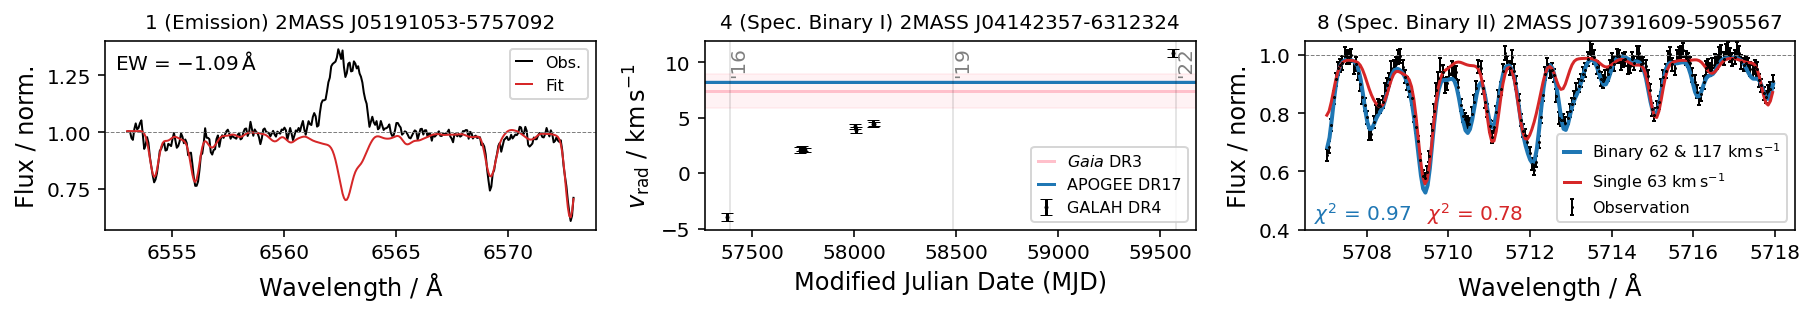

In [305]:
f, gs = plt.subplots(1,3,figsize=(16*2/2.54,6/2.54))

# Example Emission
ax = gs[0]
spectrum = Table.read('../analysis_products/'+str(examples['emission'])[:6]+'/'+str(examples['emission'])+'/'+str(examples['emission'])+'_plxcom_fit_spectrum.fits')
region = (spectrum['wave'] > 6563 - 10) & (spectrum['wave'] < 6563 + 10)
ax.plot(
    spectrum['wave'][region],
    spectrum['sob'][region],
    c = 'k', lw = 1, label = 'Obs.'
)
ax.plot(
    spectrum['wave'][region],
    spectrum['smod'][region],
    c = 'C3', lw = 1, label = 'Fit'
)
ax.text(0.02,0.85,r'EW = $'+"{:.2f}".format(data_allspec['ew_h_alpha'][data_allspec['sobject_id']==examples['emission']][0])+'\,\mathrm{\AA}$',transform=ax.transAxes)
ax.axhline(1,lw=0.5,color='grey',ls='dashed')
ax.legend(fontsize=8,handlelength = 1)
ax.set_title('1 (Emission) 2MASS J'+str(data_allspec['tmass_id'][data_allspec['sobject_id']==examples['emission']][0]),fontsize=10)
ax.set_xlabel(r'Wavelength / $\mathrm{\AA}$',fontsize=12)
ax.set_ylabel('Flux / norm.',fontsize=12)

# Example SB1
ax = gs[1]
sb1_example = data_allspec['tmass_id'] == examples['is_sb1']

ax.axhspan(
    data_allspec['rv_gaia_dr3'][sb1_example][0]-data_allspec['e_rv_gaia_dr3'][sb1_example][0],
    data_allspec['rv_gaia_dr3'][sb1_example][0]+data_allspec['e_rv_gaia_dr3'][sb1_example][0],
    zorder = 1,alpha=0.2,color='pink'
)
ax.axhline(data_allspec['rv_gaia_dr3'][sb1_example][0],label='$Gaia$ DR3',color='pink')

ax.axhspan(
    8.219257-np.sqrt(0.102010615**2+0.047451988**2),
    8.219257+np.sqrt(0.102010615**2+0.047451988**2),
    zorder = 2,alpha=0.2,color='C0'
)
ax.axhline(8.219257,label='APOGEE DR17',color='C0')

ax.errorbar(
    data_allspec['mjd'][sb1_example],
    data_allspec['rv_comp_1'][sb1_example],
    yerr = 10 * data_allspec['e_rv_comp_1'][sb1_example],
    fmt = 'o', capsize = 3, ms = 1, capthick=0.5,
    zorder = 3, label='GALAH DR4', c='k'
)
for year,mjd in zip([16,19,22],[57388,58484,59580]):
    ax.axvline(mjd,lw=0.1,color='k') # 19/01/01
    ax.text(mjd,9,"'"+str(year),rotation=90,c='grey')
ax.legend(fontsize=8,handlelength = 1)
ax.set_title('4 (Spec. Binary I) 2MASS J'+str(data_allspec['tmass_id'][sb1_example][0]),fontsize=10)
ax.set_xlabel('Modified Julian Date (MJD)',fontsize=12)
ax.set_ylabel(r'$v_\mathrm{rad}~/~\mathrm{km\,s^{-1}}$',fontsize=12)

# Example Emission
ax = gs[2]
plxcom_spectrum = Table.read('../analysis_products/'+str(examples['is_sb2'])[:6]+'/'+str(examples['is_sb2'])+'/'+str(examples['is_sb2'])+'_plxcom_fit_spectrum.fits')
binary_spectrum = Table.read('../analysis_products/'+str(examples['is_sb2'])[:6]+'/'+str(examples['is_sb2'])+'/'+str(examples['is_sb2'])+'_binary_fit_spectrum.fits')
plxcom_res = Table.read('../analysis_products/'+str(examples['is_sb2'])[:6]+'/'+str(examples['is_sb2'])+'/'+str(examples['is_sb2'])+'_plxcom_fit_results.fits')
binary_res = Table.read('../analysis_products/'+str(examples['is_sb2'])[:6]+'/'+str(examples['is_sb2'])+'/'+str(examples['is_sb2'])+'_binary_fit_results.fits')
region_center = 5712
region = (plxcom_spectrum['wave'] > region_center - 5) & (plxcom_spectrum['wave'] < region_center + 6)
ax.errorbar(
    plxcom_spectrum['wave'][region],
    plxcom_spectrum['sob'][region],
    yerr = plxcom_spectrum['uob'][region],
    color = 'k', label = 'Observation', fmt='o', ms=0.5, capsize=1, lw=1
)
ax.plot(
    binary_spectrum['wave'][region],
    binary_spectrum['smod'][region],
    c = 'C0', lw = 2, label = 'Binary '+"{:.0f}".format(binary_res['rv_1'][0])+' & '+"{:.0f}".format(binary_res['rv_2'][0])+' $\mathrm{km\,s^{-1}}$'
)
ax.plot(
    plxcom_spectrum['wave'][region],
    plxcom_spectrum['smod'][region],
    c = 'C3', lw = 1.5, label = 'Single '+"{:.0f}".format(plxcom_res['rv_gauss'][0])+' $\mathrm{km\,s^{-1}}$'
)
ax.axhline(1,lw=0.5,color='grey',ls='dashed')
ax.legend(fontsize=8,handlelength = 1)
ax.set_ylim(0.4,1.05)
ax.set_title('8 (Spec. Binary II) 2MASS J'+str(plxcom_res['tmass_id'][0]),fontsize=10)
ax.set_xlabel(r'Wavelength / $\mathrm{\AA}$',fontsize=12)
ax.set_ylabel('Flux / norm.',fontsize=12)
ax.text(0.02,0.05,r'$\chi^2$ = '+"{:.2f}".format(np.median(abs(plxcom_spectrum['sob']-plxcom_spectrum['smod'])/plxcom_spectrum['uob'])),c='C0',transform=ax.transAxes)
ax.text(0.25,0.05,r'$\chi^2$ = '+"{:.2f}".format(np.median(abs(binary_spectrum['sob']-binary_spectrum['smod'])/binary_spectrum['uob'])),c='C3',transform=ax.transAxes)
plt.tight_layout(w_pad=1.,h_pad=0)
plt.savefig('figures/examples_flag_sp.png',dpi=200,bbox_inches = 'tight')

In [240]:
# to find good tmass star with SB2

# repeats = Table()
# repeats['tmass_id'],repeats['counts'] = np.unique(data_allspec['tmass_id'],return_counts=True)
# repeats.sort('counts',reverse=True)
# repeats = repeats[1:]

# for tmass_id in repeats['tmass_id'][:200]:
#     entries = (data_allspec['tmass_id'] == tmass_id) & (data_allspec['flag_sp'] < 2**14) & np.isfinite(data_allspec['rv_gaia_dr3'])
#     if len(data_allspec['tmass_id'][entries]) > 2:
#         plt.scatter(
#             data_allspec['mjd'][entries],data_allspec['rv_comp_1'][entries]
#         )
#         print(data_allspec['rv_gaia_dr3'][entries][0])
#         plt.axhline(data_allspec['rv_gaia_dr3'][entries][0])
#         print(tmass_id)
#         plt.title(tmass_id)
#         plt.show()
#         plt.close()

In [241]:
for flag in np.arange(0,15):
    
    selection = data_allstar['flag_sp'] == 2**flag
    
    entry = list(flag_sp_dictionary.keys())[flag]
    
    if len(data_allstar['flag_sp'][selection] > 0):
        print(flag_sp_dictionary[entry],2**flag,data_allstar['sobject_id'][selection][0])
    

[4, 'Spectroscopic Binary SB1 (RV changes beyond 2sigma)'] 4 131220001801004
[16, 'Chi2 unusually low/high by 3 sigma'] 16 140305003201099
[64, 'Microturbulence (vmic) warning'] 64 140114002401006
[2048, 'Signal-to-noise indicates spectra not reliable'] 2048 131220001801010
[8192, 'Extrapolating spectrum model'] 8192 140114002401186
[16384, 'No spectroscopic analysis results available'] 16384 131220001801226


In [242]:
for flag in np.arange(0,15):
    
    selection = data_allspec['flag_sp'] == 2**flag
    
    entry = list(flag_sp_dictionary.keys())[flag]
    
    if len(data_allspec['flag_sp'][selection] > 0):
        print(flag_sp_dictionary[entry],2**flag,data_allspec['sobject_id'][selection][0])
    

[1, 'Emission in Halpha/Hbeta detected'] 1 131216001101315
[2, 'Not all 4 CCDs available'] 2 131216001601288
[8, 'Spectroscopic Binary SB2 (Double line splitting)'] 8 131216001101186
[16, 'Chi2 unusually low/high by 3 sigma'] 16 131216001101093
[32, 'Broadening (vsini) warning'] 32 131216001101014
[64, 'Microturbulence (vmic) warning'] 64 131216001101019
[2048, 'Signal-to-noise indicates spectra not reliable'] 2048 131216001101021
[4096, 'Not converged within 4 iterations'] 4096 131216001101266
[8192, 'Extrapolating spectrum model'] 8192 131216001101171
[16384, 'No spectroscopic analysis results available'] 16384 140116003201033


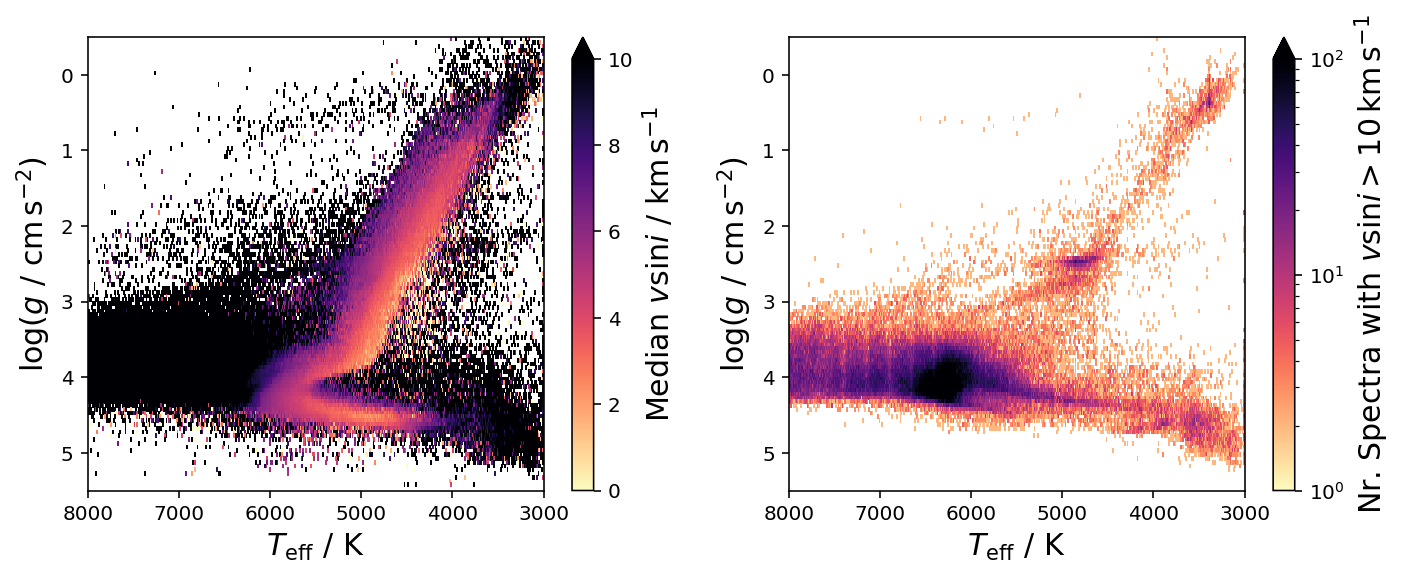

In [243]:
f, gs = plt.subplots(1,2,figsize=(10,4))

ax = gs[0]

select = np.isfinite(data_allspec['teff']) & np.isfinite(data_allspec['logg']) & np.isfinite(data_allspec['vsini'])

x = data_allspec['teff'][select]
y = data_allspec['logg'][select]
z = data_allspec['vsini'][select]

H, xedges, yedges, binnumber = stats.binned_statistic_2d(x, y, values = z, statistic='median' , bins = (np.arange(3000,8000,10),np.arange(-0.5,5.5,0.05)))
XX, YY = np.meshgrid(xedges, yedges)

s = ax.pcolormesh(XX,YY,H.T,cmap='magma_r',vmin=0,vmax=10)
cbar = plt.colorbar(s,ax=ax,extend='max')

ax.set_xlim(8000,3000)
ax.set_ylim(5.5,-0.5)
ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)
cbar.set_label(r'Median $v \sin i~/~\mathrm{km\,s^{-1}}$',fontsize=15)

ax = gs[1]

select = (data_allspec['vsini'] > 10) & np.isfinite(data_allspec['teff']) & np.isfinite(data_allspec['logg']) & np.isfinite(data_allspec['vsini'])

x = data_allspec['teff'][select]
y = data_allspec['logg'][select]
z = data_allspec['vsini'][select]

H, xedges, yedges, binnumber = stats.binned_statistic_2d(x, y, values = z, statistic='count' , bins = (np.arange(3000,8000,10),np.arange(-0.5,5.5,0.05)))
H[H<=1.] = np.NaN

XX, YY = np.meshgrid(xedges, yedges)

s = ax.pcolormesh(XX,YY,H.T,cmap='magma_r', norm=LogNorm(vmin=1, vmax = 100))
cbar = plt.colorbar(s,ax=ax,extend='max')

ax.set_xlim(8000,3000)
ax.set_ylim(5.5,-0.5)
ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)
cbar.set_label(r'Nr. Spectra with $v \sin i > 10\,\mathrm{km\,s^{-1}}$',fontsize=15)

plt.tight_layout()
plt.savefig('figures/teff_logg_vsini.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

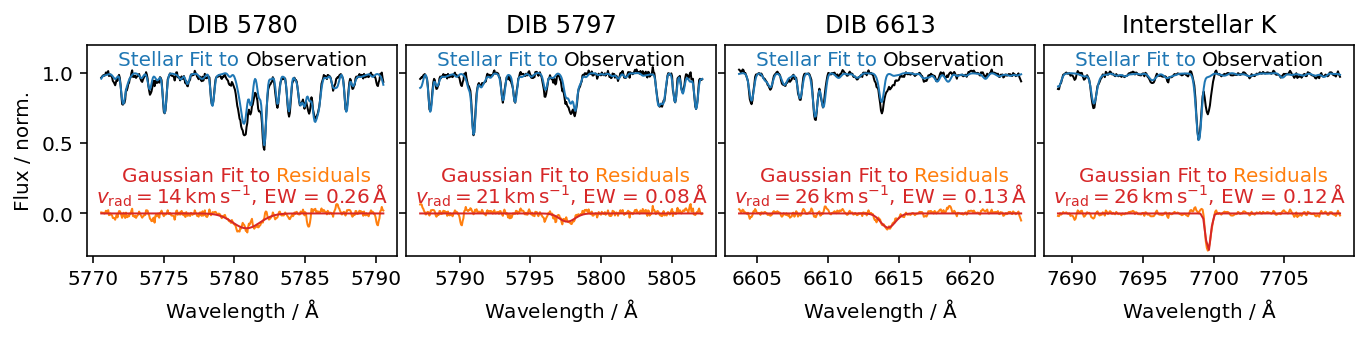

In [229]:
example = [
    ['DIB 5780',5780.59],
    ['DIB 5797',5797.19],
    ['DIB 6613',6613.66],
    ['Interstellar K',7698.9643]
]

sobject_id = 131216001601014
tmass_id = '06453479-0102137'

allspec = Table.read('../catalogs/galah_dr4_allspec_230206.fits')
allspec = allspec[allspec['sobject_id']==sobject_id]

f, gs = plt.subplots(1,np.shape(example)[0],sharey=True,figsize=(10,2.5))

def gauss_func(x, a, x0, sigma):
    return -np.abs(a)*np.exp(-(x-x0)**2/(2*sigma**2))

for ax_index, (reason, wavelength) in enumerate(example):
    
    spectrum = Table.read('../analysis_products/'+str(sobject_id)[:6]+'/'+str(sobject_id)+'/'+str(sobject_id)+'_single_fit_spectrum.fits')
    
    in_wavelength_range = np.abs(spectrum['wave'] - wavelength) < 10

    ax = gs[ax_index]
    ax.set_title(reason)    
    ax.plot(
        spectrum['wave'][in_wavelength_range],
        spectrum['sob'][in_wavelength_range],
        c = 'k', label = 'Observation (Star + IS contribution)',lw=1
    )
    ax.plot(
        spectrum['wave'][in_wavelength_range],
        spectrum['smod'][in_wavelength_range],
        c = 'C0', label = 'Fit (Star)',lw=1
    )
    ax.plot(
        spectrum['wave'][in_wavelength_range],
        spectrum['sob'][in_wavelength_range] - spectrum['smod'][in_wavelength_range],
        c = 'C1', label = 'Residual',lw=1
    )
    
    if reason[:3] == 'DIB':
        popt = [allspec['ew_dib'+reason[-4:]][0] / (allspec['sigma_dib'+reason[-4:]][0] * np.sqrt(2*np.pi)), wavelength + allspec['rv_dib'+reason[-4:]][0]/299792.4580 * wavelength, allspec['sigma_dib'+reason[-4:]][0]]
        ew = allspec['ew_dib'+reason[-4:]][0]
        rv = allspec['rv_dib'+reason[-4:]][0]
    if reason == 'Interstellar K':
        popt = [allspec['ew_k_is'][0] / (allspec['sigma_k_is'][0] * np.sqrt(2*np.pi)), wavelength + allspec['rv_k_is'][0]/299792.4580 * wavelength, allspec['sigma_k_is'][0]]
        ew = allspec['ew_k_is'][0]
        rv = allspec['rv_k_is'][0]
    sample_range = np.linspace(spectrum['wave'][in_wavelength_range][0],spectrum['wave'][in_wavelength_range][-1],100)

    ax.plot(
        sample_range,
        gauss_func(sample_range,*popt),
        c = 'C3',lw=1
    )
    ax.set_ylim(-0.3,1.2)
    ax.text(0.51,0.9,'Observation',color='k',transform=ax.transAxes,ha='left')
    ax.text(0.49,0.9,'Stellar Fit to',color='C0',transform=ax.transAxes,ha='right')
    ax.text(0.61,0.35,'Residuals',color='C1',transform=ax.transAxes,ha='left')
    ax.text(0.59,0.35,'Gaussian Fit to',color='C3',transform=ax.transAxes,ha='right')
    ax.text(0.5,0.25,r'$v_\mathrm{rad} = '+"{:.0f}".format(rv)+'\,\mathrm{km\,s^{-1}}$, EW = $'+"{:.2f}".format(ew)+'\,\mathrm{\AA}$',color='C3',transform=ax.transAxes,ha='center')
    if ax_index == 0:
        ax.set_ylabel('Flux / norm.')
    ax.set_xlabel(r'Wavelength / $\mathrm{\AA}$')
plt.tight_layout(w_pad=-2.2)
plt.savefig('figures/example_dibs_'+tmass_id+'.png',dpi=200,bbox_inches='tight')

No handles with labels found to put in legend.


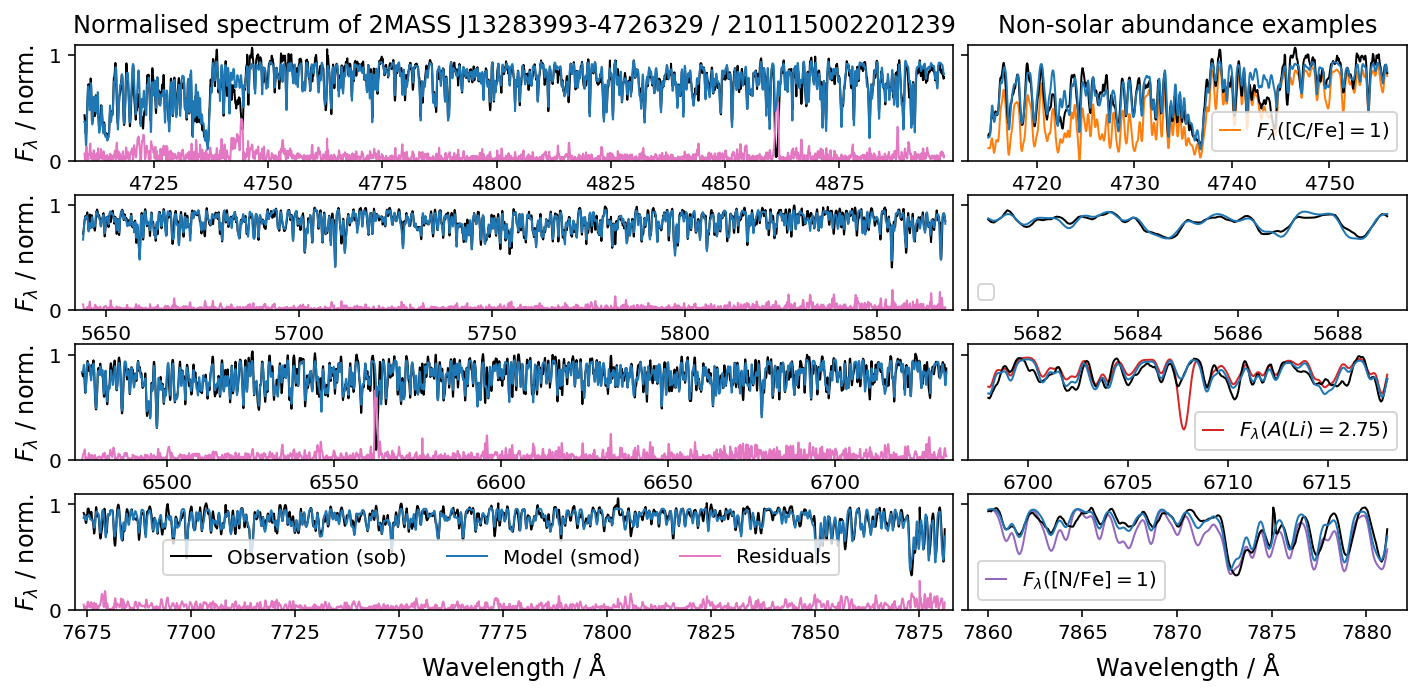

In [374]:
sobject_id = 210115002201239 # 210115002201239 or 140314005201392
tmass_id = 'VESTA' # VESTA or 2MASS J13283993-4726329

# sobject_id = 140314005201392
# tmass_id = '2MASS J13283993-4726329'

observation = Table.read('../analysis_products/'+str(sobject_id)[:6]+'/'+str(sobject_id)+'/'+str(sobject_id)+'_plxcom_fit_spectrum.fits')
gradient_spectrum = dict()
gradient_spectrum['li_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_li_fe_2.75.fits')
gradient_spectrum['c_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_c_fe_1.00.fits')
gradient_spectrum['n_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_n_fe_1.50.fits')
gradient_spectrum['o_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_o_fe_1.50.fits')
# gradient_spectrum['na_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_na_fe_-1.00.fits')
gradient_spectrum['ba_fe'] = Table.read('example_gradients/'+str(sobject_id)+'_grad_ba_fe_1.50.fits')

f,gs = plt.subplots(4,2,figsize=(10,5),sharey=True,gridspec_kw={'width_ratios': [2, 1]})

gs[0,0].set_title('Normalised spectrum of '+tmass_id+' / '+str(210115002201239))
gs[0,1].set_title('Non-solar abundance examples')

for ax_index in range(1,4+1):
#     if ax_index == 1:
#         ax = gs[0,0]
#     if ax_index == 2:
#         ax = gs[0,1]
#     if ax_index == 3:
#         ax = gs[1,0]
#     if ax_index == 4:
#         ax = gs[1,1]
    ax = gs[ax_index-1,0]

    observation_ccd = (observation['wave'] > (ax_index +3) * 1000) * (observation['wave'] < (ax_index +4) * 1000)
    
    ax.plot(
        observation['wave'][observation_ccd],
        observation['sob'][observation_ccd],
        c = 'k',zorder = 1, lw = 1,
        label = 'Observation (sob)'
    )
    ax.plot(
        observation['wave'][observation_ccd],
        observation['smod'][observation_ccd],
        c = 'C0', zorder=2, lw = 1,
        label = 'Model (smod)'
    )
    ax.plot(
        observation['wave'][observation_ccd],
        np.abs(observation['sob'][observation_ccd] - observation['smod'][observation_ccd]),
        c = 'C6',zorder = 1, lw = 1,
        label = 'Residuals'
    )
    if ax_index == 4:
        ax.legend(ncol=3,loc=(0.1,0.3))
    
    ax.set_xlim(observation['wave'][observation_ccd][0]-2,observation['wave'][observation_ccd][-1]+2)
    ax.set_ylabel('$F_\lambda$ / norm.',fontsize=12)
    if ax_index in [4]:
        ax.set_xlabel(r'Wavelength / $\mathrm{\AA}$',fontsize=12)
        
examples = np.array([
    [4715,4756],
    [5681,5689],
    [6708-10,6708+10],
    [7860,7886.878],
])

for ax_index, example in enumerate(examples):

    ax = gs[ax_index,1]
    observation_ccd = (observation['wave'] > example[0]) & (observation['wave'] < example[1])  

    ax.plot(
        observation['wave'][observation_ccd],
        observation['sob'][observation_ccd],
        c = 'k',zorder = 1, lw = 1,
        label = '_nolegend_'
    )
    ax.plot(
        observation['wave'][observation_ccd],
        observation['smod'][observation_ccd],
        c = 'C0', zorder=2, lw = 1,
        label = '_nolegend_'
    )

    if ax_index == 0:
        ax.plot(
            gradient_spectrum['c_fe']['wave'][observation_ccd],
            gradient_spectrum['c_fe']['smod'][observation_ccd],
            c = 'C1', zorder=0, label=r'$F_\lambda (\mathrm{[C/Fe]} = 1)$', lw=1
        )
#     if ax_index == 1:
#         ax.plot(
#             gradient_spectrum['na_fe']['wave'][observation_ccd],
#             gradient_spectrum['na_fe']['smod'][observation_ccd],
#             c = 'C2', zorder=0, label=r'$F_\lambda (\mathrm{[Na/Fe]} = -1)$', lw=1
#         )
    if ax_index == 2:
        ax.plot(
            gradient_spectrum['li_fe']['wave'][observation_ccd],
            gradient_spectrum['li_fe']['smod'][observation_ccd],
            c = 'C3', zorder=0, label=r'$F_\lambda (A(Li) = 2.75)$', lw=1
        )
    if ax_index == 3:
        ax.plot(
            gradient_spectrum['n_fe']['wave'][observation_ccd],
            gradient_spectrum['n_fe']['smod'][observation_ccd],
            c = 'C4', zorder=0, label=r'$F_\lambda (\mathrm{[N/Fe]} = 1)$', lw=1
        )
    ax.legend(handlelength=1)

    if ax_index in [3]:
        ax.set_xlabel(r'Wavelength / $\mathrm{\AA}$',fontsize=12)

ax.set_ylim(0.0,1.1)
plt.tight_layout(w_pad=-3,h_pad=0)
plt.savefig('figures/'+str(sobject_id)+'_abundance_examples.png',bbox_inches='tight',dpi=200)